In [1]:
import seaborn as sns
%config Inlinebackend.figure_format = 'retina'
%matplotlib inline
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ----------------- #
import os
from sys import platform
# ----------------- #
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [608]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
39957,39957,0.74,Very Good,I,SI1,63.8,58.0,5.72,5.76,3.66,7.763


In [609]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
3703,3703,0.5,Ideal,H,VVS1,61.9,54.0,5.13,5.14,3.18


In [610]:
df_train_modified = df_train
df_test_modified = df_test

In [611]:
# defining a function to assign a numerical value to each diamond cut type.

def cut_type(value):
    cut_type = {
        'Ideal': 5,
        'Premium': 4,
        'Very Good': 3,
        'Good': 2,
        'Fair': 1
    }

    return cut_type.get(value, 'Unknown')

In [612]:
# defining a function to assign a numerical value to each diamond clarity type.

def color_type(value):
    color_type = {
        'D': 7,
        'E': 6,
        'F': 5,
        'G': 4,
        'H': 3,
        'I': 2,
        'J': 1
    }

    return color_type.get(value, 'Unknown') 

In [613]:
def clarity_type_fun(value):
    clarity_type = {
        'IF': 8,
        'VVS1': 7,
        'VVS2': 6,
        'VS1': 5,
        'VS2': 4,
        'SI1': 3,
        'SI2': 2,
        'I1': 1
    }
    
    
    return clarity_type.get(value, 'Unknown')

In [614]:
df_train_modified["clarity_processed"] = df_train_modified["clarity"].apply(clarity_type_fun)
df_train_modified["color_processed"] = df_train_modified["color"].apply(color_type)
df_train_modified["cut_processed"] = df_train_modified["cut"].apply(cut_type)

In [615]:
df_test_modified["clarity_processed"] = df_test_modified["clarity"].apply(clarity_type_fun)
df_test_modified["color_processed"] = df_test_modified["color"].apply(color_type)
df_test_modified["cut_processed"] = df_test_modified["cut"].apply(cut_type)

In [616]:
price_column = df_train_modified['price']
df_train_modified.drop('price', axis=1, inplace=True)
df_train_modified['price'] = price_column
df_train_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,clarity_processed,color_processed,cut_processed,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,4,7,2,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,6,3,3,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,7,3,4,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,5,6,5,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,6,4,5,9.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,6,4,5,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,5,3,2,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,4,6,5,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,2,7,4,6.385


In [617]:
df_train_modified = df_train.select_dtypes(exclude='object')
print(df_train_modified.shape[0])
df_train_modified

40455


,id,carat,depth,table,x,y,z,clarity_processed,color_processed,cut_processed,price
0,0,1.02,63.2,58.0,6.36,6.40,4.03,4,7,2,8.928
1,1,0.35,61.0,57.0,4.54,4.57,2.77,6,3,3,6.477
2,2,0.31,60.5,58.0,4.43,4.40,2.67,7,3,4,6.810
3,3,0.38,61.4,56.0,4.66,4.69,2.87,5,6,5,6.824
4,4,1.64,61.8,56.0,7.59,7.60,4.69,6,4,5,9.776
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,62.2,55.0,6.77,6.81,4.23,6,4,5,9.149
40451,40451,1.50,64.2,56.0,7.30,7.09,4.62,5,3,2,9.077
40452,40452,1.06,61.9,55.0,6.54,6.58,4.06,4,6,5,8.892
40453,40453,0.31,60.1,58.0,4.40,4.38,2.64,2,7,4,6.385


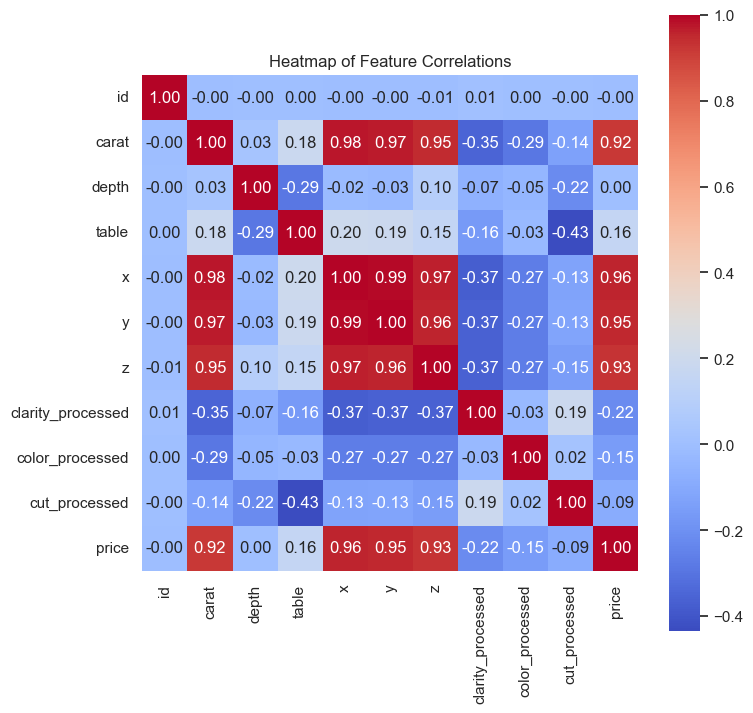

In [618]:
corr_matrix = df_train_modified.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [619]:
df_train_modified

,id,carat,depth,table,x,y,z,clarity_processed,color_processed,cut_processed,price
0,0,1.02,63.2,58.0,6.36,6.40,4.03,4,7,2,8.928
1,1,0.35,61.0,57.0,4.54,4.57,2.77,6,3,3,6.477
2,2,0.31,60.5,58.0,4.43,4.40,2.67,7,3,4,6.810
3,3,0.38,61.4,56.0,4.66,4.69,2.87,5,6,5,6.824
4,4,1.64,61.8,56.0,7.59,7.60,4.69,6,4,5,9.776
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,62.2,55.0,6.77,6.81,4.23,6,4,5,9.149
40451,40451,1.50,64.2,56.0,7.30,7.09,4.62,5,3,2,9.077
40452,40452,1.06,61.9,55.0,6.54,6.58,4.06,4,6,5,8.892
40453,40453,0.31,60.1,58.0,4.40,4.38,2.64,2,7,4,6.385


In [620]:
X = df_train_modified.iloc[:,:-1]
y = df_train_modified['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32364, 10), (8091, 10), (32364,), (8091,))

In [621]:
df_test_modified

,id,carat,cut,color,clarity,depth,table,x,y,z,clarity_processed,color_processed,cut_processed
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.01,6.06,3.71,3,5,5
1,1,0.50,Fair,F,I1,63.8,58.0,5.08,4.97,3.21,1,5,1
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.43,4.46,2.67,6,7,5
3,3,1.52,Fair,I,SI2,64.7,58.0,7.19,7.22,4.66,2,2,1
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.55,4.53,2.76,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.23,5.20,3.20,6,7,5
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.50,6.56,3.87,4,6,3
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.34,7.31,4.44,4,3,4
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.75,4.76,2.97,6,6,5


In [622]:
df_test_modified = df_test_modified.select_dtypes(exclude='object')
print(df_test_modified.shape[0])
df_test_modified.sample()

13485


,id,carat,depth,table,x,y,z,clarity_processed,color_processed,cut_processed
8927,8927,0.33,62.8,55.0,4.41,4.45,2.78,5,5,5


In [623]:
regressor = SVR(kernel = 'rbf')
rf = RandomForestRegressor(max_depth = 70, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 400)
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
lr = LinearRegression()
ridge = Ridge(random_state=42)

In [624]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
regressor.fit(X_train, y_train)

In [ ]:
rf_predictions = rf.predict(X_test)
gb_predictions = gb.predict(X_test)
lr_predictions = lr.predict(X_test)
ridge_predictions = ridge.predict(X_test)
svr_predictions = regressor.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("Random Forest:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")
print(f"MAE: {rf_mae}\n")

Random Forest:
MSE: 0.024529431484566534
RMSE: 0.1566187456359121
R²: 0.9760816622676535
MAE: 0.11875259124229975



In [ ]:
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

print("Gradient Boosting:")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"R²: {gb_r2}")
print(f"MAE: {gb_mae}\n")

Gradient Boosting:
MSE: 0.024963163631900907
RMSE: 0.15799735324334047
R²: 0.9756587355483022
MAE: 0.12277260045744909



In [ ]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

print("Linear Regression:")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R²: {lr_r2}")
print(f"MAE: {lr_mae}\n")

Linear Regression:
MSE: 0.08717828152708361
RMSE: 0.2952596848997228
R²: 0.9149935626595211
MAE: 0.15472871703074095



In [ ]:
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

print("Ridge:")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R²: {ridge_r2}")
print(f"MAE: {ridge_mae}")

Ridge:
MSE: 0.08726697736040966
RMSE: 0.29540984641749785
R²: 0.9149070764766563
MAE: 0.1547657292066943


In [ ]:
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)

print("SVR:")
print(f"MSE: {svr_mse}")
print(f"RMSE: {svr_rmse}")
print(f"R²: {svr_r2}")
print(f"MAE: {svr_mae}\n")

SVR:
MSE: 1.0257832761560919
RMSE: 1.0128095952132818
R²: -0.00022827087253562972
MAE: 0.8741618858202932



In [ ]:
rf_predictions = rf.predict(df_test_modified)
gb_predictions = gb.predict(df_test_modified)
lr_predictions = lr.predict(df_test_modified)
ridge_predictions = ridge.predict(df_test_modified)
svr_predictions = regressor.predict(df_test_modified)

In [ ]:
df_submission_rf = df_test_modified.copy()
df_submission_rf['price'] = rf_predictions
df_for_submission_rf = df_submission_rf[['id', 'price']]
df_for_submission_rf.to_csv('submission_rf.csv', index=False)

print("Random Forest:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")
print(f"MAE: {rf_mae}\n")

Random Forest:
MSE: 0.024529431484566534
RMSE: 0.1566187456359121
R²: 0.9760816622676535
MAE: 0.11875259124229975



In [ ]:
df_submission_gb = df_test_modified.copy()
df_submission_gb['price'] = gb_predictions
df_for_submission_gb = df_submission_gb[['id', 'price']]
df_for_submission_gb.to_csv('submission_gb.csv', index=False)

print("Gradient Boosting:")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"R²: {gb_r2}")
print(f"MAE: {gb_mae}\n")

Gradient Boosting:
MSE: 0.024963163631900907
RMSE: 0.15799735324334047
R²: 0.9756587355483022
MAE: 0.12277260045744909



In [ ]:
df_submission_lr = df_test_modified.copy()
df_submission_lr['price'] = lr_predictions
df_for_submission_lr = df_submission_lr[['id', 'price']]
df_for_submission_lr.to_csv('submission_lr.csv', index=False)

print("Linear Regression:")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R²: {lr_r2}")
print(f"MAE: {lr_mae}\n")

Linear Regression:
MSE: 0.08717828152708361
RMSE: 0.2952596848997228
R²: 0.9149935626595211
MAE: 0.15472871703074095



In [ ]:
df_submission_ridge = df_test_modified.copy()
df_submission_ridge['price'] = ridge_predictions
df_for_submission_ridge = df_submission_ridge[['id', 'price']]
df_for_submission_ridge.to_csv('submission_ridge.csv', index=False)

print("Ridge:")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R²: {ridge_r2}")
print(f"MAE: {ridge_mae}")

Ridge:
MSE: 0.08726697736040966
RMSE: 0.29540984641749785
R²: 0.9149070764766563
MAE: 0.1547657292066943


In [ ]:
df_submission_svr = df_test_modified.copy()
df_submission_svr['price'] = svr_predictions
df_for_submission_svr = df_submission_svr[['id', 'price']]
df_for_submission_svr.to_csv('submission_svr.csv', index=False)

print("SVR:")
print(f"MSE: {svr_mse}")
print(f"RMSE: {svr_rmse}")
print(f"R²: {svr_r2}")
print(f"MAE: {svr_mae}\n")

SVR:
MSE: 1.0257832761560919
RMSE: 1.0128095952132818
R²: -0.00022827087253562972
MAE: 0.8741618858202932

